In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [139]:
!pip install pyspark
!pip install tweepy
!pip install nltk
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425350 sha256=f64753c37d5f4d2be111e817e1bf92e92c23179195662d188ada5a737f4ef6a2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 3.5 MB/s eta 0:00:00


In [1]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# đọc dữ liệu từ file csv
path = '/kaggle/input/hann0810/Top-1000-Celebrity-Twitter-Accounts.csv'
dataframe = pd.read_csv(path , encoding='latin-1')
dataframe.head(988)

,twitter_username,twitter_userid,domain,name,followers_count,tweet_count,test,Date,Time
0,BarackObama,813286.0,obamabook.com,BarackObama,13444655.0,16467.0,#studiolife #aislife #requires #passion #dedic...,4/4/2022,8:11:00 PM
1,justinbieber,27260086.0,smarturl.it,Justin Bieber,114357427.0,31399.0,@user #white #supremacists want everyone to s...,7/6/2022,5:00:00 PM
2,katyperry,21447363.0,katyperry.com,KATY PERRY,108900656.0,11625.0,safe ways to heal your #acne!! #altwaystohe...,7/6/2022,3:42:00 PM
3,rihanna,79293791.0,rihannanow.com,Rihanna,106201663.0,10630.0,is the hp and the cursed child book up for res...,7/7/2022,3:58:00 PM
4,Cristiano,155659213.0,NaN,Cristiano Ronaldo,99274403.0,3780.0,"3rd #bihday to my amazing, hilarious #nephew...",8/8/2022,3:42:00 PM
...,...,...,...,...,...,...,...,...,...
983,wandaicardi,NaN,NaN,Wanda Icardi,NaN,NaN,when you finally see a picture of the orlando ...,11/24/2022,9:03:00 PM
984,S1dharthM,NaN,NaN,Sidharth Malhotra,NaN,NaN,"i know that is one of ""my squirrels"" and the m...",11/24/2022,4:14:00 PM
985,superstarrajini,NaN,NaN,Rajinikanth,NaN,NaN,touch gestures on watchos. #wwdc16,11/24/2022,10:02:00 PM
986,MikeVick,NaN,fanduel.com,Mike Vick,NaN,NaN,please like &amp; share if you are agree #dna...,11/25/2022,9:25:00 PM


In [61]:
# Kiểm tra dữ liệu của cột Date
print(dataframe['Date'].dtype)

object


In [65]:
# Chuyển đổi kiểu dữ liệu cột "date" thành "int"
dataframe["Date"] = pd.to_datetime(dataframe["Date"])

# Xuất dữ liệu
print(dataframe.head())

  twitter_username  twitter_userid          domain               name  \
0      BarackObama        813286.0   obamabook.com        BarackObama   
1     justinbieber      27260086.0     smarturl.it      Justin Bieber   
2        katyperry      21447363.0   katyperry.com         KATY PERRY   
3          rihanna      79293791.0  rihannanow.com            Rihanna   
4        Cristiano     155659213.0             NaN  Cristiano Ronaldo   

   followers_count  tweet_count  \
0       13444655.0      16467.0   
1      114357427.0      31399.0   
2      108900656.0      11625.0   
3      106201663.0      10630.0   
4       99274403.0       3780.0   

                                                test       Date        Time  
0  #studiolife #aislife #requires #passion #dedic... 2022-04-04  8:11:00 PM  
1   @user #white #supremacists want everyone to s... 2022-07-06  5:00:00 PM  
2  safe ways to heal your #acne!!    #altwaystohe... 2022-07-06  3:42:00 PM  
3  is the hp and the cursed child book

In [70]:
# Kiểm tra dữ liệu của cột Date
print(dataframe['Date'].dtype)

datetime64[ns]


In [91]:
# Kiểm tra dữ liệu của cột Time
print(dataframe['Time'].dtype)

object


In [94]:
dataframe["Time"] = pd.to_datetime(dataframe["Time"])
# Xuất dữ liệu
print(dataframe.head())

  twitter_username  twitter_userid          domain               name  \
0      BarackObama        813286.0   obamabook.com        BarackObama   
1     justinbieber      27260086.0     smarturl.it      Justin Bieber   
2        katyperry      21447363.0   katyperry.com         KATY PERRY   
3          rihanna      79293791.0  rihannanow.com            Rihanna   
4        Cristiano     155659213.0             NaN  Cristiano Ronaldo   

   followers_count  tweet_count  \
0       13444655.0      16467.0   
1      114357427.0      31399.0   
2      108900656.0      11625.0   
3      106201663.0      10630.0   
4       99274403.0       3780.0   

                                                test      Date  \
0  #studiolife #aislife #requires #passion #dedic...  4/4/2022   
1   @user #white #supremacists want everyone to s...  7/6/2022   
2  safe ways to heal your #acne!!    #altwaystohe...  7/6/2022   
3  is the hp and the cursed child book up for res...  7/7/2022   
4    3rd #bihday to 

In [95]:
# Kiểm tra dữ liệu của cột Time
print(dataframe['Time'].dtype)

datetime64[ns]


In [56]:

# Phân tích các bài đăng của một người nổi tiếng cụ thể
person = "Justin Bieber"
data_person = data[data["name"] == person]

In [96]:
# Xem dữ liệu của người nổi tiếng
print(data_person.head())

  twitter_username  twitter_userid       domain           name  \
1     justinbieber      27260086.0  smarturl.it  Justin Bieber   

   followers_count  tweet_count  \
1      114357427.0      31399.0   

                                                test  
1   @user #white #supremacists want everyone to s...  


In [98]:
# Phân tích các bài đăng của một người nổi tiếng cụ thể
person = "BarackObama"
data_person = data[data["name"] == person]

In [99]:
# Xem dữ liệu của người nổi tiếng
print(data_person.head())

  twitter_username  twitter_userid         domain         name  \
0      BarackObama        813286.0  obamabook.com  BarackObama   

   followers_count  tweet_count  \
0       13444655.0      16467.0   

                                                test  
0  #studiolife #aislife #requires #passion #dedic...  


In [131]:
# Lấy ra 10 tài khoản Twitter có nhiều bài đăng nhất
top_10_accounts = dataframe.sort_values(by="tweet_count", ascending=False).head(10)

# In ra danh sách 10 tài khoản Twitter có nhiều bài đăng nhất
print(top_10_accounts)

    twitter_username  twitter_userid            domain  \
276      lopezdoriga     236636515.0   lopezdoriga.com   
431      PerezHilton      19329393.0   PerezHilton.com   
879   6BillionPeople      33923443.0  MarquisTrill.com   
772      neilhimself      18393773.0    neilgaiman.com   
710        ochocinco      40519997.0    ocnnreport.com   
403       micheltelo      38185503.0    micheltelo.com   
588    SintoniaVerso     382613598.0               NaN   
841    AdelAliBinAli     542936786.0               NaN   
517     mustafa_agha     351528904.0           mbc.net   
524         LAURAGII      64444249.0         laurag.tv   

                            name  followers_count  tweet_count  \
276      JoaquÃ­n LÃ³pez-DÃ³riga        8056348.0     412131.0   
431                 Perez Hilton        5521856.0     355356.0   
879                MarQuis Trill        2076640.0     183452.0   
772                  Neil Gaiman        2899891.0     179506.0   
710                 Chad Johnso

In [137]:
#lấy tất cả các dữ liệu của bảng loại sản phẩm gắn vào 1 biến bất kì 
baocao = dataframe['name'].unique()

TypeError: 'value' must be an instance of str or bytes, not a float

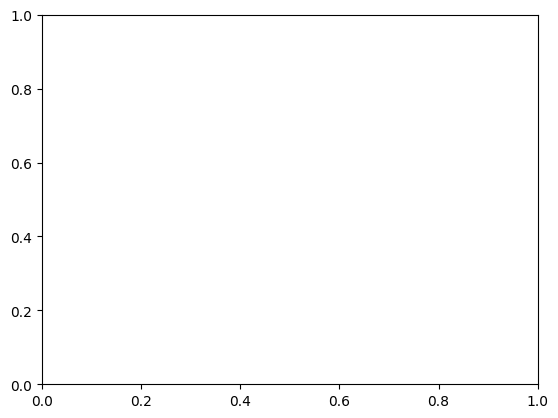